In [4]:
import spatialdata
import spatialdata_plot
import dask_image.imread
import dask.array as da
import napari_spatialdata
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.colors as mcolors

import geopandas as gpd
import anndata as ad
import numpy as np
import anndata as ad
from loguru import logger

import sys, os
sys.path.append(os.path.abspath("../src/opendvp/"))

for package in [spatialdata, napari_spatialdata]:
    print(f"{package.__name__}: {package.__version__}")

/opt/homebrew/Caskroom/mambaforge/base/envs/spatialdata/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


spatialdata: 0.3.0
napari_spatialdata: 0.5.5


In [2]:
!mamba list

# packages in environment at /opt/homebrew/Caskroom/mambaforge/base/envs/spatialdata:
#
# Name                    Version                   Build  Channel
aiobotocore               2.5.4                    pypi_0    pypi
aiohappyeyeballs          2.4.6              pyhd8ed1ab_0    conda-forge
aiohttp                   3.11.13         py312h998013c_0    conda-forge
aioitertools              0.12.0                   pypi_0    pypi
aiosignal                 1.3.2              pyhd8ed1ab_0    conda-forge
alabaster                 1.0.0              pyhd8ed1ab_1    conda-forge
anndata                   0.11.3             pyhd8ed1ab_0    conda-forge
annotated-types           0.7.0              pyhd8ed1ab_1    conda-forge
aom                       3.9.1                h7bae524_0    conda-forge
app-model                 0.3.0              pyhd8ed1ab_0    conda-forge
appdirs                   1.4.4              pyhd8ed1ab_1    conda-forge
appnope                   0.1.4              pyhd8ed1ab_

# Step 0: Load sdata

In [4]:
sdata = spatialdata.read_zarr("/Users/jnimoca/Jose_BI/1_Pipelines/openDVP/data/sdata/sdata_991.zarr")

/opt/homebrew/Caskroom/mambaforge/base/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


# Step 1: Decide on color map for phenotypes and RCNs

In [5]:
sdata['imaging_991'].obs.phenotype.value_counts()

phenotype
Unknown           218068
Cancer_cells      216397
CD4_Tcells        109335
COL1A1_cells       45124
CD8_Tcells          8826
Vimentin_cells      7933
B_cells             3578
Macrophages          921
Name: count, dtype: int64

In [6]:
# 8 cell types
import seaborn as sns

In [11]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [12]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [ ]:
# decision
# we will use tab10 for phenotype in images, good contrast, will use colorblind variation for plots

In [ ]:
import matplotlib.colors as mcolors



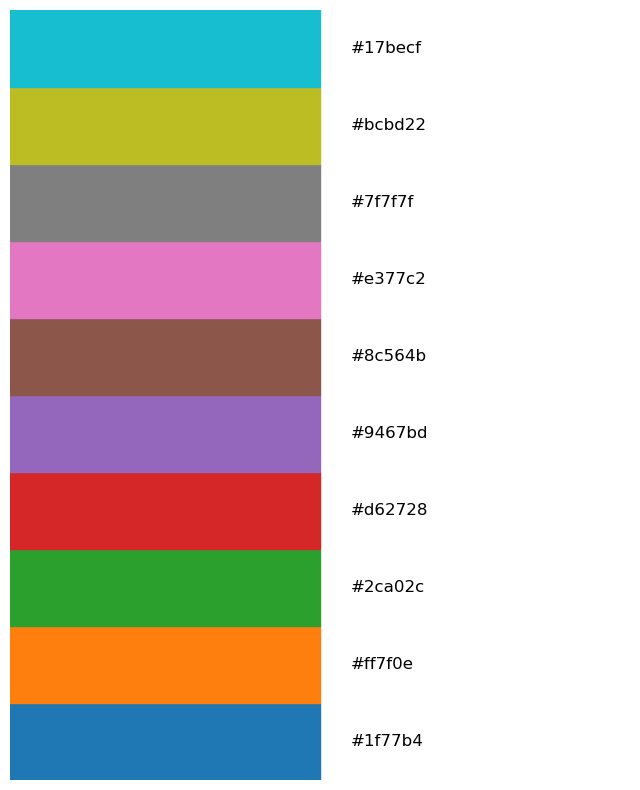

In [58]:
colors = sns.color_palette("tab10")
hex_colors = [mcolors.to_hex(c) for c in colors]

# Create a horizontal color palette plot
fig, ax = plt.subplots(figsize=(8, len(colors) * 1))

# Plot each color as a rectangle
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((0, i), 1, 1, color=color))
    ax.text(1.1, i + 0.5, color, ha='left', va='center', fontsize=12)

# Adjust plot limits and aesthetics
ax.set_xlim(0, 2)
ax.set_ylim(0, len(colors))
ax.axis('off')

plt.show()

In [17]:
phenotype_colors = { 
    "Unknown":      "#7f7f7f",  #grey
    "Cancer_cells": "#d62728",  #red
    "CD4_Tcells":   "#1f77b4",  #blue
    "COL1A1_cells": "#ff7f0e",  #orange
    "CD8_Tcells":   "#9467bd",  #purple
    "Vimentin_cells":"#bcbd22", #ocre
    "B_cells":       "#17becf", #cyan
    "Macrophages":  "#2ca02c", #green
}

/var/folders/x7/grkjlk8s223dy6234rnz1885mxz2_6/T/ipykernel_5466/1988191619.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


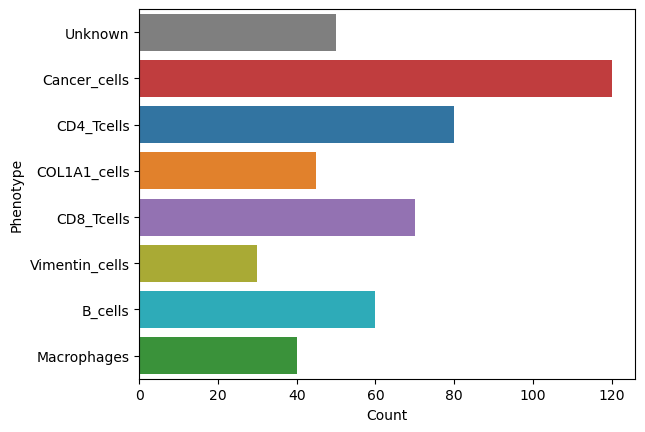

In [20]:
# Example barplot using the palette
data = {
    "Phenotype": list(phenotype_colors.keys()),
    "Count": [50, 120, 80, 45, 70, 30, 60, 40]
}

sns.barplot(
    x="Count", 
    y="Phenotype", 
    data=data, 
    palette=phenotype_colors
)
plt.show()

In [21]:
# now for RCNs, this is tricky since they vary between parameters
# for now just for KNN30

sdata['imaging_991'].obs.columns

Index(['CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity',
       'artefact', 'Area_filter_nottoobig', 'Area_filter_nottoolow',
       'Area_filter', 'DAPI_ratio', 'DAPI_ratio_pass_nottoolow',
       'DAPI_ratio_pass_nottoohigh', 'DAPI_ratio_pass', 'filtering', 'imageid',
       'phenotype', 'cell_id', 'spatial_lda_knn7_kmeans_k7',
       'spatial_lda_knn14_kmeans_k7', 'spatial_lda_knn21_kmeans_k7',
       'spatial_lda_knn30_kmeans_k7', 'spatial_lda_knn40_kmeans_k7',
       'spatial_lda_knn50_kmeans_k7', 'shapes'],
      dtype='object')

In [48]:
def plot_rcn_stacked_barplot(df, phenotype_col, rcn_col, normalize=True):
    """
    Plots a stacked barplot showing phenotype composition per RCN motif.
    
    Parameters:
    df (DataFrame): Input dataframe containing phenotype and RCN columns
    phenotype_col (str): Column name for phenotypes
    rcn_col (str): Column name for RCN motifs
    normalize (bool): If True, normalize frequencies to proportions per motif
    """
    # Count frequencies of each phenotype within each RCN
    count_df = df.groupby([rcn_col, phenotype_col]).size().unstack(fill_value=0)
    
    # Normalize to proportions if requested
    if normalize:
        count_df = count_df.div(count_df.sum(axis=1), axis=0)
    
    # Create the stacked barplot
    fig, ax = plt.subplots(figsize=(8, 6))
    
    bottoms = [0] * len(count_df)
    for phenotype, color in phenotype_colors.items():
        if phenotype in count_df.columns:
            ax.bar(count_df.index, count_df[phenotype],
                   bottom=bottoms, color=color, label=phenotype)
            bottoms = [i + j for i, j in zip(bottoms, count_df[phenotype])]
    
    # Customize plot
    ax.legend(title="Phenotype", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylabel("Proportion" if normalize else "Count")
    ax.set_xlabel("RCN Motif")
    ax.set_title("Phenotype Composition per RCN Motif")
    plt.tight_layout()
    plt.show()

/var/folders/x7/grkjlk8s223dy6234rnz1885mxz2_6/T/ipykernel_5466/285896834.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df.groupby([rcn_col, phenotype_col]).size().unstack(fill_value=0)


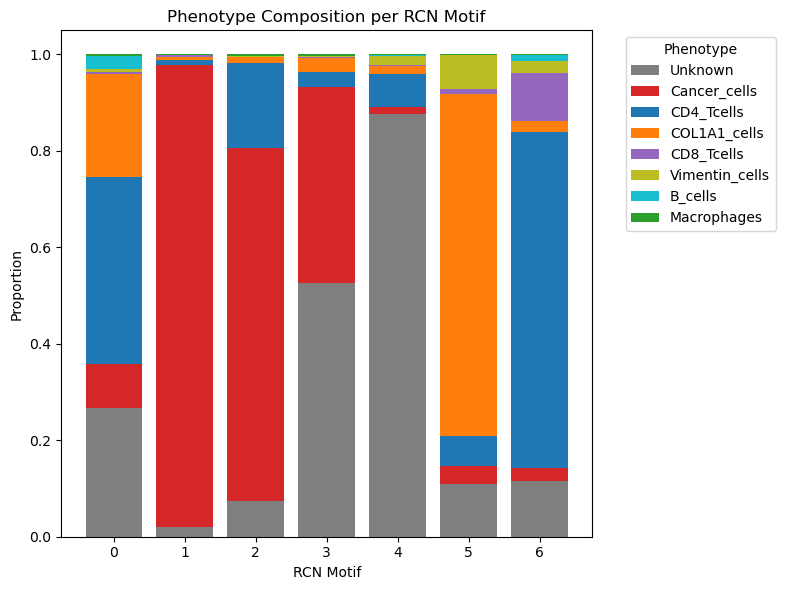

In [53]:
plot_rcn_stacked_barplot(
    df= sdata['imaging_991'].obs,
    phenotype_col="phenotype",
    rcn_col="spatial_lda_knn21_kmeans_k7"
)

In [63]:
sdata['imaging_991'].obs.spatial_lda_knn21_kmeans_k7.dtype

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6'], ordered=False, categories_dtype=object)

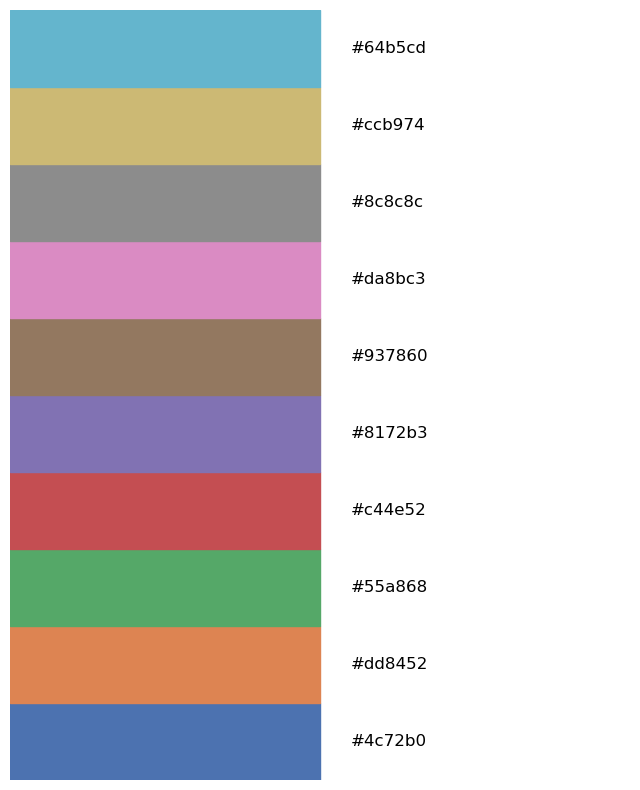

In [60]:
colors = sns.color_palette("deep")
hex_colors = [mcolors.to_hex(c) for c in colors]

# Create a horizontal color palette plot
fig, ax = plt.subplots(figsize=(8, len(colors) * 1))

# Plot each color as a rectangle
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((0, i), 1, 1, color=color))
    ax.text(1.1, i + 0.5, color, ha='left', va='center', fontsize=12)

# Adjust plot limits and aesthetics
ax.set_xlim(0, 2)
ax.set_ylim(0, len(colors))
ax.axis('off')

plt.show()

In [55]:
sns.color_palette("deep")

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [65]:
RCN_colors = {
    "0" : "#64b5cd", #cyan
    "1" : "#c44e52", #red
    "2" : "#da8bc3", #pink
    "3" : "#ccb974", #ocre
    "4" : "#8c8c8c", #grey
    "5" : "#dd8452", #orange
    "6" : "#4c72b0", #blue
}

# Step 2: Export segmentation mask colored by phenotype with colors

In [1]:
RCN_colors = {
    "0" : "#64b5cd", #cyan
    "1" : "#c44e52", #red
    "2" : "#da8bc3", #pink
    "3" : "#ccb974", #ocre
    "4" : "#8c8c8c", #grey
    "5" : "#dd8452", #orange
    "6" : "#4c72b0", #blue
}

In [2]:
phenotype_colors = { 
    "Unknown":      "#7f7f7f",  #grey
    "Cancer_cells": "#d62728",  #red
    "CD4_Tcells":   "#1f77b4",  #blue
    "COL1A1_cells": "#ff7f0e",  #orange
    "CD8_Tcells":   "#9467bd",  #purple
    "Vimentin_cells":"#bcbd22", #ocre
    "B_cells":       "#17becf", #cyan
    "Macrophages":  "#2ca02c", #green
    "filtered_out": "#000000", #black
}

In [5]:
sdata = spatialdata.read_zarr("/Users/jnimoca/Jose_BI/1_Pipelines/openDVP/data/sdata/sdata_991.zarr")

/opt/homebrew/Caskroom/mambaforge/base/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


In [6]:
sdata['imaging_991'].uns['phenotype_colors'] = phenotype_colors

In [7]:
sdata['imaging_991'].uns['RCN_colors'] = RCN_colors

In [8]:
import qupath_utils

In [10]:
import importlib
importlib.reload(qupath_utils)

<module 'qupath_utils' from '/Users/jnimoca/Jose_BI/1_Pipelines/openDVP/src/opendvp/qupath_utils.py'>

In [11]:
qupath_utils.sdata_to_qupath_detections(
    sdata = sdata,
    key_to_shapes = "mask_polygons",
    export_path = "../data/colored_pheno.geojson",
    table_key = "imaging_991",
    index_table_by = "CellID",
    classify_by = "phenotype",
    color_dict = "phenotype_colors"
)

2025-03-20 14:41:45.111 | INFO     | qupath_utils:sdata_to_qupath_detections:97 - Converting mask_polygons geodataframe to detections
2025-03-20 14:41:45.114 | INFO     | qupath_utils:sdata_to_qupath_detections:127 - Check of inputs completed, starting conversion to detections
2025-03-20 14:41:45.115 | INFO     | qupath_utils:sdata_to_qupath_detections:138 - Naming detections as cellID
2025-03-20 14:41:45.281 | INFO     | qupath_utils:sdata_to_qupath_detections:142 - Labeling geometries as detections, for smooth viewing in QuPath
2025-03-20 14:41:45.285 | INFO     | qupath_utils:sdata_to_qupath_detections:146 - Classifying detections by phenotype
2025-03-20 14:41:45.289 | INFO     | qupath_utils:sdata_to_qupath_detections:147 - Classes found in table:
phenotype
Unknown           218068
Cancer_cells      216397
CD4_Tcells        109335
COL1A1_cells       45124
CD8_Tcells          8826
Vimentin_cells      7933
B_cells             3578
Macrophages          921
2025-03-20 14:41:45.381 | IN